In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\Marwan\salary_data_cleaned.csv')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer provided,min_salary,max_salary,avg_salary,Job_simp,Seniority,company_txt,Age,job_desc_len,Python,Spark,Excel,AWS,State,Same State,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,data scientist,NaN,Tecolote Research,47,38,1,0,1,0,NM,0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,data scientist,NaN,University of Maryland Medical System,36,48,1,0,0,0,MD,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,data scientist,NaN,KnowBe4,10,34,1,1,1,0,FL,1,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,data scientist,NaN,PNNL,55,49,1,0,0,0,WA,1,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,data scientist,NaN,Affinity Solutions,22,28,1,0,1,0,NY,1,3
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0,data scientist,NaN,CyrusOne,20,31,1,0,1,1,TX,1,3
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54,93,73.5,data scientist,NaN,ClearOne Advantage,12,8,0,0,1,0,MD,1,0
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86,142,114.0,data scientist,NaN,Logic20/20,15,26,1,1,1,1,CA,0,0
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,38,84,61.0,data scientist,NaN,Rochester Regional Health,6,8,0,0,0,0,NY,1,0
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160,140.0,data scientist,NaN,<intent>,11,49,1,1,0,0,NY,1,2


In [5]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'Job_simp', 'Seniority', 'company_txt', 'Age', 'job_desc_len', 'Python',
       'Spark', 'Excel', 'AWS', 'State', 'Same State', 'num_comp'],
      dtype='object')

In [7]:
df.shape

(742, 31)

In [8]:
df_model = df[['Rating','Size','Type of ownership','Sector','Industry','Revenue','num_comp','avg_salary','hourly', 'employer provided','State', 'Same State','Python',
       'Spark', 'Excel', 'AWS','job_desc_len','Job_simp', 'Seniority','Age']]

In [9]:
df_model.shape

(742, 20)

## convert categorical features to dummies

In [10]:
df_dummy = pd.get_dummies(df_model)

In [11]:
df_dummy.shape

(742, 177)

In [12]:
df_dummy.head(10)

,Rating,num_comp,avg_salary,hourly,employer provided,Same State,Python,Spark,Excel,AWS,job_desc_len,Age,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,State_ AL,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,State_ FL,State_ GA,State_ IA,State_ ID,State_ IL,State_ IN,State_ KS,State_ KY,State_ LA,State_ Los Angeles,State_ MA,State_ MD,State_ MI,State_ MN,State_ MO,State_ NC,State_ NE,State_ NJ,State_ NM,State_ NY,State_ OH,State_ OR,State_ PA,State_ RI,State_ SC,State_ TN,State_ TX,State_ UT,State_ VA,State_ WA,Stat

## splitting the data to train and test sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_dummy.drop('avg_salary',axis = 1)
Y = df_dummy['avg_salary'].values

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

## Linear regression using statsmodel

In [16]:
import statsmodels.api as sm

In [17]:
x_sm = sm.add_constant(x_train)
model = sm.OLS(y_train,x_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     6.827
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.87e-55
Time:                        14:28:51   Log-Likelihood:                -2643.0
No. Observations:                 593   AIC:                             5570.
Df Residuals:                     451   BIC:                             6193.
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                27.9580     10.520      2.658      0.008       7.283      48.633
Rating                                                5.5699      2.383      2.338      0.020       0.888      10.252
num_comp                                              2.2888      1.043      2.195      0.029       0.240       4.338
hourly                                              -25.2915     10.897     -2.321      0.021     -46.707      -3.876
employer provided                                    30.6479     15.071      2.034      0.043       1.029      60.267
Same State                                            1.8137      3.114      0.583      0.561      -4.305       7.933
Python                                               11.1773      2.817      3.968      0.000       5.642      16.713
Spark                                                -4.5444      3.479     -1.306      0.192     -11.381       2.292
Excel                                                 0.6225      2.702      0.230      0.818      -4.687       5.932
AWS                                                   4.6654      3.211      1.453      0.147      -1.645      10.976
job_desc_len                                         -0.0502      0.069     -0.724      0.469      -0.186       0.086
Age                                                   0.0046      0.004      1.170      0.243      -0.003       0.012
Size_-1                                               8.1639      9.267      0.881      0.379     -10.048      26.376
Size_1 to 50 employees                                4.7776      7.698      0.621      0.535     -10.352      19.907
Size_10000+ employees                                -6.1575      7.184     -0.857      0.392     -20.277       7.962
Size_1001 to 5000 employees                           6.4633      4.555      1.419      0.157      -2.487      15.414
Size_201 to 500 employees                             1.9587      4.509      0.434      0.664      -6.903      10.821
Size_5001 to 10000 employees                         -3.4137      6.414     -0.532      0.595     -16.019       9.192
Size_501 to 1000 employees                            6.1879      4.887      1.266      0.206      -3.415      15.791
Size_51 to 200 employees                              7.5557      5.115      1.477      0.140      -2.497      17.608
Size_Unknown                                          2.4221     17.983      0.135      0.893     -32.919      37.763
Type of ownership_-1                                  8.1639      9.267      0.881      0.379     -10.048      26.376
Type of ownership_College / University              -10.5013     20.903     -0.502      0.616     -51.580      30.577
Type of ownersh

## Linear Regression using sklearn - Multiplelinear regression

In [18]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

In [19]:
lm = LinearRegression()
lm.fit(x_train,y_train)
np.mean(cross_val_score(lm,x_train,y_train,scoring = 'neg_mean_absolute_error',cv = 3))

-21.034511686401444

## Linear Regression using sklearn - Lasso regression

In [36]:
lm2 = Lasso(alpha = 0.1)
lm2.fit(x_train,y_train)
np.mean(cross_val_score(lm2,x_train,y_train,scoring = 'neg_mean_absolute_error',cv = 3))

-19.723691001491357

In [21]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lm2 = Lasso(alpha = i/100)
    lm2.fit(x_train,y_train)
    error.append(np.mean(cross_val_score(lm2,x_train,y_train,scoring = 'neg_mean_absolute_error',cv = 3)))

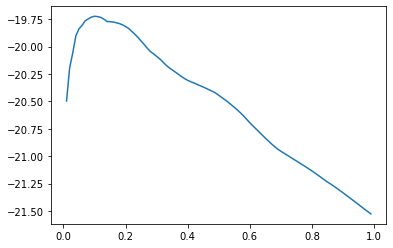

In [22]:
plt.plot(alpha,error)

In [23]:
err = tuple(zip(alpha,error))

In [24]:
err_df = pd.DataFrame(err,columns = ['alpha','error'])
err_df[err_df['error'] == err_df['error'].max()]

,alpha,error
9,0.1,-19.723691


## Linear Regression using sklearn - RandomForest

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [26]:
np.mean(cross_val_score(rf,x_train,y_train,scoring = 'neg_mean_absolute_error',cv = 3))

-15.246251936311792

## Using GridSearch to estimate the best parameters

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameters = {'n_estimators':(range(10,300,10)), 'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

In [30]:
gs = GridSearchCV(rf,parameters,scoring = 'neg_mean_absolute_error',cv = 3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [31]:
gs.best_score_

-15.150313579487298

In [32]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=90)

## Predicting the test set

In [39]:
y_pred_lm = lm.predict(x_test)
y_pred_lml = lm2.predict(x_test)
y_pred_rf = gs.best_estimator_.predict(x_test)

## Calculating the Error on the test set

In [42]:
from sklearn.metrics import mean_absolute_error

In [44]:
print(mean_absolute_error(y_test,y_pred_lm))
print(mean_absolute_error(y_test,y_pred_lml))
print(mean_absolute_error(y_test,y_pred_rf))

19.276000074363214
20.56844165744571
12.53351976137211
